<img src="https://techcrunch.com/wp-content/uploads/2020/06/GettyImages-1149449083.jpg?w=1390&crop=1" alt="Youtube" width="600" />

# YOUTUBE SPAM COMMENT CLASSIFIER - NAIVE BAYES

Youtube has been a place for big public space for all ranging from chilren to the old... The comments in the Youtube are visible to each visitor. Some bad folks use the comment section to trick some visitors to direct some traffic to their link. It is especially dangerous if the link consists of harmful content (virus, trojans, etc...) or even inproper content (adult contents, illegal drugs, etc...).

**Motiviation 👐**

Being a tech giant brings responsibility of controlling the content created by other users visible to others. It puts legal and ethical pressure on Youtube development team to ensure avoiding spam comments and well maintaining the content. 

The development team at Youtube was asked to sort out the bad/spam comments to avoid any side effects on the community, particulary to the kids. They were urgently asked to flag bad comments in their comment systems.

**Dataset 🟥**

Datasource is obtained from the website of [UCI](https://archive.ics.uci.edu/ml/machine-learning-databases/00380/).  
The comments were collected via the YouTube API from five of the ten most viewed videos on YouTube in the first half of 2015. All 5 are music videos. One of them is “Gangnam Style” by Korean artist Psy. The other artists were Katy Perry, LMFAO, Eminem, and Shakira.

**Target**🎯

The goal of this project to train a machine learning model that can predict whether a comment is a spam or not.

For this purpose, we will use Naive Bayes algorithms confirming to our cases: Multinomial and Complement approaches.

# SETUP LIBRARIES 🧪

In [54]:
#libs to handle data
import pandas as pd
import numpy as np

#loading sklearn libs
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

#loading plotting libs
import matplotlib.pyplot as plt
import seaborn as sns

# LOADING **DATA**

In [3]:
#list of files
files = ['Youtube01.csv','Youtube02.csv', 'Youtube03.csv',
         'Youtube04.csv', 'Youtube05.csv']

In [56]:
# Reading files with a loop
# During each iteration, create a pandas DataFrame by reading the current .csv file. 
# Drop the unneccesary columns (along axis 1) and append the dataframe to the 'all_df' list.
all_df = []
for ii in files: 
    all_df.append(pd.read_csv('data/'+ii).drop(['COMMENT_ID','AUTHOR','DATE'],axis= 1))

In [77]:
print('Class=0 for non-spam comments \t Class=1 for spam comments')
all_df[0].head(10)

Class=0 for non-spam comments 	 Class=1 for spam comments


,CONTENT,CLASS
0,"Huh, anyway check out this you[tube] channel: ...",1
1,Hey guys check out my new channel and our firs...,1
2,just for test I have to say murdev.com,1
3,watch?v=vtaRGgvGtWQ Check this out .﻿,1
4,"Hey, check out my new website!! This site is a...",1
5,Subscribe to my channel ﻿,1
6,i turned it on mute as soon is i came on i jus...,0
7,You should check my channel for Funny VIDEOS!!﻿,1
8,and u should.d check my channel and tell me wh...,1
9,Hey subscribe to me﻿,1


In [9]:
#concatting all data together
df = pd.concat(all_df, axis = 0, ignore_index = True)

In [10]:
df.size

3910

In [11]:
#checking if any missing values is there
df.isnull().sum()

CONTENT    0
CLASS      0
dtype: int64

# PREPROCESSING 🐡

**Splitting Train and Test**

In [25]:
#selection of inputs and target
X = df['CONTENT']
Y = df['CLASS']

In [36]:
Y.value_counts()

1    1004
0     951
Name: CLASS, dtype: int64

In [78]:
# splitting arrays into train and test
# Test size of 20% of the data goes to testing.
# Since 'train_test_split()' distributes the points randomly, we set a seed equal to 17
# The 'stratify' argument allows for splitting the data in such a way that
# the training and the testing datasets contain an equal portion of samples from both classes.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
                                                    test_size= 0.2, 
                                                    random_state = 17,
                                                    stratify = Y)

In [37]:
print('Train',Y_train.value_counts(),'Test',Y_test.value_counts())

Train 1    803
0    761
Name: CLASS, dtype: int64 Test 1    201
0    190
Name: CLASS, dtype: int64


**Vectorizer - Tokenizing comments**

In [33]:
#tokenizing the words in the comments after splitting.
#so that the comments in train set are not learnt by tokenizer.
vectorizer = CountVectorizer()

In [34]:
#fitting + transforming X_train
#transforming X_test
X_train_tf = vectorizer.fit_transform(X_train)
X_test_tf = vectorizer.transform(X_test)

In [35]:
X_train_tf.shape

(1564, 3812)

In [ ]:
X_train_tf.toarray()

#NAIVE BAYES CLASSIFIERS 🤛

We have a variety of classifiers in sklearn

1 - Gaussian: likelihood is assumed to be Gaussian. Most suitable when features are continuous.  
2 - Bernoulli: assuming binary-valued features.  
3 - Categorical: assuming each category has its own distribution.  

Two models below are best suited for text classification. Imblanced dataset are better handled.  
4 - *Multinomial*  
5 - *Complement*  

###**1-Defining MultinomialNB**

In [39]:
#first let's instanticate Multinomial Naive Bayes classifier
clf = MultinomialNB()

In [40]:
clf.fit(X_train_tf, Y_train)

MultinomialNB()

In [42]:
#alpha: smoothing parameters
#class_prior: specific values for prior probabilities
#fit_prior: boolean, priors are uniform by default.
clf.get_params()

{'alpha': 1.0, 'class_prior': None, 'fit_prior': True}

In [47]:
#predicting test data
Y_test_pred = clf.predict(X_test_tf)

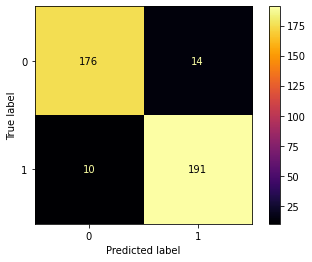

In [68]:
sns.reset_orig()

ConfusionMatrixDisplay.from_predictions(
    Y_test, Y_test_pred,
    labels = clf.classes_,
    cmap= 'inferno'
)

**Results**  
True Negative= 176 (negative samples correctly predicted)  
True Positive = 191 (positive samples correctly predicted)  

False predictions  
False Negative = 10 (Type 1 errors, false alarms, detected as spam but harmless samples)  
False Positive = 14 (Type 2 errors, a miss)  

We identified almost correctly all spam messages.

In [53]:
#Let's check other metrics
print(classification_report(Y_test, Y_test_pred, target_names = ['OK','Spam']))


              precision    recall  f1-score   support

          OK       0.95      0.93      0.94       190
        Spam       0.93      0.95      0.94       201

    accuracy                           0.94       391
   macro avg       0.94      0.94      0.94       391
weighted avg       0.94      0.94      0.94       391



**Accuracy, F1 Score, Precision, Recall**
Accuracy = (TN + TP) / allsampes -> probability of predicting spam or not correctly  
Precisions = TP / (TP + FP)  
 -> probability of predicting spam as a true spam over all samples classified as spam  
--- ---
Recall = TP / (TP + FN)  
-> how many true spams has caught and how many has been missed.  
--- ---
F1 = harmonic mean of precision and recall  
 = 2 / [ (1/0.97) + (1/0.88) ]  
Check this result with arithmetic mean  = (precision + Recall) / 2   

###**2-Defining ComplementNB**

In [69]:
#second let's use Complement NB
clf2 = ComplementNB()

In [70]:
clf2.fit(X_train_tf, Y_train)

ComplementNB()

In [71]:
#alpha: smoothing parameters
#class_prior: specific values for prior probabilities
#fit_prior: boolean, priors are uniform by default.
clf2.get_params()

{'alpha': 1.0, 'class_prior': None, 'fit_prior': True, 'norm': False}

In [72]:
#predicting test data
Y_test_pred = clf2.predict(X_test_tf)

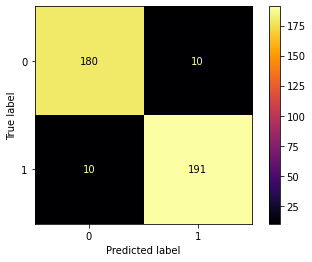

In [73]:
sns.reset_orig()

ConfusionMatrixDisplay.from_predictions(
    Y_test, Y_test_pred,
    labels = clf2.classes_,
    cmap= 'inferno'
)

**Results**  
True Negative= 180 (negative samples correctly predicted)  
True Positive = 191 (positive samples correctly predicted)  

False predictions  
False Negative = 10 (Type 1 errors, false alarms, detected as spam but harmless samples)  
False Positive = 10 (Type 2 errors, a miss)  

We identified almost correctly all spam messages.

In [74]:
#Let's check other metrics
print(classification_report(Y_test, Y_test_pred, target_names = ['OK','Spam']))


              precision    recall  f1-score   support

          OK       0.95      0.95      0.95       190
        Spam       0.95      0.95      0.95       201

    accuracy                           0.95       391
   macro avg       0.95      0.95      0.95       391
weighted avg       0.95      0.95      0.95       391



**Observations:**  
We can observe that the performance of two approahces MultinominalNB and complementNB are close to each other, both predict almost spams almost correctly. F1 score of ComplementNB is only 1% better. 

We can conclude that the training a machine learning model with Naives Bayes classification was successful on Youtube Spam Comment classification.

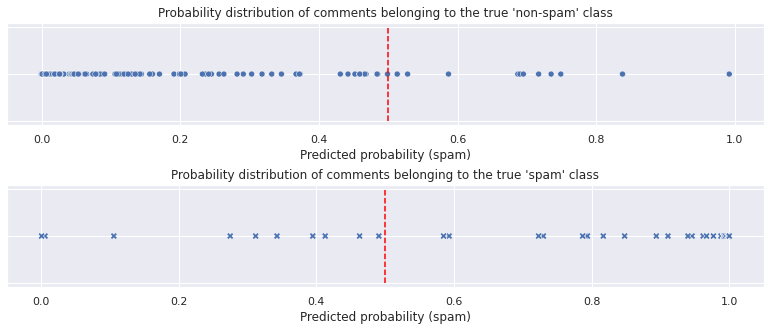

In [82]:
#creating probability-distribution figures 
# adapted from 365 datascience project. 
# ref. https://learn.365datascience.com/courses/machine-learning-with-naive-bayes

# For each ovservation, store its probability of being a spam. Round it to 3 digits after the decimal points.
# These probabilities will later serve as the x-coordinates of a scatter plot
spam_proba = clf.predict_proba(X_test_tf).round(3)[:,1];

# Create a new data frame which will store the true classes, the predicted classes and the predicted probability
# for an observation to belong to the spam class
df_scatter = pd.DataFrame()

# Create the columns of the data frame
df_scatter['True class'] = Y_test
df_scatter['Predicted class'] = Y_test_pred
df_scatter['Predicted probability (spam)'] = spam_proba

# Reset the index of the data frame, so that the indexing is sequential
df_scatter = df_scatter.reset_index(drop = True)

# Create two new data frames. The first one stores the samples whose true class is 0.
# The second one stores the samples whose true class is 1.
df_scatter_0 = df_scatter[df_scatter['True class'] == 0].reset_index(drop = True)
df_scatter_1 = df_scatter[df_scatter['True class'] == 1].reset_index(drop = True)

# Set the seaborn style
sns.set()

# Create two subfigures, so that they are arranged in 2 rows and 1 column.
# Set the size of the figures
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12,5))
fig.tight_layout(pad = 3)

# Create a scatter plot.
# On the x-axis, we have the predicted probability of a comment being a spam.
# The y-axis takes only one value - zero. We create an array full of zeros having a length equal to 
sns.scatterplot(x = 'Predicted probability (spam)', 
                y = np.zeros(df_scatter_0.shape[0]), 
                data = df_scatter_0,
                hue = 'True class', 
                markers = ['o'],
                style = 'True class',
                legend = False, 
                ax = ax1).set(yticklabels=[])

# Set a title above the first plot.
ax1.set_title('Probability distribution of comments belonging to the true \'non-spam\' class')
ax1.vlines(0.5, -1, 1, linestyles = 'dashed', colors = 'red');

# The comments above apply to this plot. The code is adapted to the spam class
sns.scatterplot(x = 'Predicted probability (spam)', 
                y = np.zeros(df_scatter_1.shape[0]), 
                hue = 'True class', 
                data = df_scatter_1,
                s = 50,
                markers = ['X'],
                style = 'True class',
                legend = False, 
                ax = ax2).set(yticklabels=[])
# Set a title above the second plot.
ax2.set_title('Probability distribution of comments belonging to the true \'spam\' class')
# Create a red vertical dahsed line for the second plot
ax2.vlines(0.5, -1, 1, linestyles = 'dashed', colors = 'red');

#CONCLUSION

Spams in the comment section of Youtube videos are neccessary to be filtered out seen the gigantic amount of visitors to the website. In this notebook, two machine learning models were trained to classify whether a Youtube comment is spam or not.

We conclude that

* Two approaches MultinominalNB and complementNB were found to predict almost all of the spam comments correctly. F1 score of ComplementNB is 95%, only 1% better than MultinominalNB.

* Either Naive Bayes model can be used to filter out these comments including spams.

--- END OF NOTEBOOK ---
#END